## 피자굽기

In [ ]:
# 김영주님 코드 - 발표용 ppt파일과 함께 살펴 보시면 좋을 듯 합니다.
for t in range(1, int(input())+1):
    n, m = map(int, input().split())
    cheese = list(map(int, input().split()))
    queue = [i for i in range(n)]
    temp = n
    while len(queue) > 1:
        i = queue.pop(0)
        cheese[i] //= 2
        if cheese[i] > 0:
            queue.append(i)
        elif temp < m:
            queue.append(temp)
            temp += 1
    print('#%s %s' % (t, queue[0]+1))

In [ ]:
## 속도가 제일 빠르네요 ^_^
## 그런데 오류가 있답니다 어디가 오류일까요?
T = int(input())
for t in range(1, T+1):
    N, M = map(int, input().split())
    CI = list(map(int, input().split()))
    Q = [i for i in range(N)]   # 화덕에 들어가는 치즈번호
    idx = [i for i in range(N, M)]  # 화덕에 들어가지 않은 치즈번호
    
    # 치즈 녹이고나서 0인지 검사, 화덕에 들어갈 다음 치즈 번호 선택이 잘못됨
    while len(Q) > 1:
        x = Q.pop(0)
        if CI[x] == 0:
            if idx:
                i = idx.pop()
                Q.append(i)
        else:
            CI[x] //= 2
            Q.append(x)
    print('#%d %d' %(t,Q[0] + 1))

In [ ]:
    while True:
        if len(oven) == 1:
            break

In [ ]:
    while len(oven) > 1:

In [ ]:
# 코드를 조금 더 깔끔한 형식으로 변경, 논리적으로 변경
T = int(input())
for t in range(1, T+1):
    N, M = map(int, input().split())
    pizza = list(map(int, input().split()))
    oven = [i for i in range(N)]
    idx = N-1
    while True:
        if len(oven) == 1:
            break
        target = oven.pop(0)
        pizza[target] //= 2
        if pizza[target] > 0:
            oven.append(target)
        elif pizza[target] == 0:  #  어떤 것을 먼저 비교하는 것이 좋은지 생각해 보세요.
            idx += 1
            if idx > M-1:
                continue
            oven.append(idx)
    print("#%d %d" % (t, oven[0]+1))

## 노드의 거리

In [ ]:
# Queue에 거리에 대한 정보 넣기
# 비가중치 그래프 A - B
# Queue에 동일한 정점에 대한 정보가 여러 번 들어가는 경우는 사용하지 않는 것이 좋음

def BFS():
    while q:
        x, l = q.pop(0)
        for n in to_go[x]:
            if n == end:
                return l+1
            elif n not in visited:
                q.append((n, l+1))
    return 0
 
 
for t in range(1, int(input())+1):
    V, E = map(int, input().split())
    to_go = [[] for _ in range(V+1)]
    for e in range(E):
        s, e = map(int, input().split())
        to_go[s].append(e)
        to_go[e].append(s)
    start, end = map(int, input().split())
    #find = 0
    q = [(start, 0)]
    visited = [start]
    print("#%d %d" %(t, BFS()))

In [ ]:
# visited에 거리 정보를 넣는 방법
def bfs_graph(g, start, end):
    queue = [start]
    visited[start] = 0
    while queue:
        a = queue.pop(0)
        level = visited[a]
        for i in g[a]:
            if i == end:
                return level + 1
            if not visited[i]:
                visited[i] = level + 1
                queue.append(i)
    return 0
 
 
for tc in range(1, 1 + int(input())):
    V, E = map(int, input().split())
    edges = [tuple(map(int, input().split())) for _ in range(E)]
    S, G = map(int, input().split())
    AL = [[] for _ in range(V + 1)]
    visited = [0] * (V + 1)
    for s, e in edges:
        AL[s].append(e)
        AL[e].append(s)
 
    print('#{} {}'.format(tc, bfs_graph(AL, S, G)))
About

In [ ]:
def BFS(S, G):
    q = []
    visited = [0] * (V + 1)
    visited[S] = 1
    q.append(S)
    while q:
        target = q.pop(0)
        if target == G:
            break
        for i in AL[target]:
            if not visited[i]:
                visited[i] = visited[target] + 1
                q.append(i)
    return visited   # G를 방문하지 않은 경우 값은?
 
for t in range(1, int(input())+1):
    V, E = map(int, input().split())
    AL = [[] for _ in range(V+1)]
    for i in range(E):
        s, e = map(int, input().split())
        AL[s].append(e)
        AL[e].append(s)
    S, G = map(int, input().split())
    ans = BFS(S, G)[G] - 1  # 무조건 -1을 해도 좋을까?
    print('#%d %d' % (t, ans))

In [ ]:
def get_distance(start, end):
    queue = []
    visited = [0] * (V + 1)
    visited[start] = 1
    queue.append(start)
    while queue:
        target = queue.pop(0)
        for x in AL[target]:
            if not visited[x]:
                if x == end:
                    return visited[target]
                visited[x] = visited[target] + 1
                queue.append(x)
    return 0
 
 
T = int(input())
for t in range(1, T+1):
    V, E = map(int, input().split())
    AL = [[] for _ in range(V + 1)]
    for _ in range(E):
        s, e = map(int, input().split())
        AL[s].append(e)
        AL[e].append(s)
    start, end = map(int, input().split())
     
    ans = get_distance(start, end)
    print('#%d %d' % (t, ans))

## 미로의 거리

In [ ]:
dxy = [[0, 1], [1, 0], [0, -1], [-1, 0]]
 
 
def get_start_position(a, n):
    for i in range(n):
        for j in range(n):
            if a[i][j] == 2:
                return i, j
    return 'error'
 
 
def bfs_maze(cr, cc):
    level = 0  # 0으로 했을 때 문제는 없나?
    queue = [(cr, cc)]
    visit[cr][cc] = level
 
    while queue:
        nr, nc = queue.pop(0)
        level = visit[nr][nc]
        for dr, dc in dxy:
            row = nr + dr
            col = nc + dc
            if row < 0 or row >= N or col < 0 or col >= N:
                continue
                
            if maze[row][col] == 0 and visit[row][col] == 0:
                visit[row][col] = level + 1
                queue.append((row, col))
            elif maze[row][col] == 3:
                return level
    return 0
 
 
for tc in range(1, 1 + int(input())):
    N = int(input())
    maze = [list(map(int, input())) for _ in range(N)]
    visit = [[0] * N for _ in range(N)]
 
    sr, sc = get_start_position(maze, N)
    result = bfs_maze(sr, sc)
 
    print('#{} {}'.format(tc, result))

In [ ]:
def get_start():
    for i in range(n):
        for j in range(n):
            if maze[i][j] == '2':
                return i, j
  
t = int(input())
for test_case in range(1, t + 1):
    n = int(input())
    maze = [list(input()) for _ in range(n)]
  
    queue, answer = [(*get_start(), 0)], 0
    while queue:
        i, j, depth = queue.pop(0)
  
        if (not 0 <= i < n) or (not 0 <= j < n):
            continue
  
        if maze[i][j] == '3':
            answer = depth - 1
            break
  
        if maze[i][j] in ('0', '2'):
            maze[i][j] = '1'
            depth += 1
            queue += [(i + 1, j, depth), (i - 1, j, depth),
                      (i, j + 1, depth), (i, j - 1, depth)]
  
    print('#%d %d' % (test_case, answer))

In [ ]:
def BFS_maze(sr, sc, er, ec):
    drc = [[1, 0], [-1, 0], [0, 1], [0, -1]]
    visited = [[0]*(N+2) for _ in range(N+2)]
    distance = [[0]*(N+2) for _ in range(N+2)]
    queue = []
    queue.append((sr, sc))
    visited[sr][sc] = True
    distance[sr][sc] = 0
    cnt = 1
    while queue:
        for _ in range(len(queue)):
            tr, tc = queue.pop(0)
            for i in range(4):
                nr = tr+drc[i][0]
                nc = tc+drc[i][1]
                if maze[nr][nc] != 1 and visited[nr][nc] == 0:
                    visited[nr][nc] = True
                    distance[nr][nc] = cnt
                    queue.append((nr, nc))
        cnt += 1
    result = distance[er][ec]
    if result > 0:
        return result-1
    else:
        return 0
 
T = int(input())
for t in range(1, T+1):
    N = int(input())
    maze = [[1]*(N+2)]
    for _ in range(N):
        maze.append([1] + list(map(int, input())) + [1])
    maze.append([1]*(N+2))
    sr, sc = 0, 0
    er, ec = 0, 0
    for r in range(1, N+1):
        for c in range(1, N+1):
            if maze[r][c] == 2:
                sr, sc = r, c
            elif maze[r][c] == 3:
                er, ec = r, c
 
    print("#%d %d" % (t, BFS_maze(sr, sc, er, ec)))

## 조합(Combination)

### n개 원소에서 k개를 선택

In [ ]:
# 1. 경우의 수 나열
a = [1, 2, 3, 4]
n = 4, k = 2
 i  j
{1, 2}
{1, 3}
{1, 4}
{2, 3}
{2, 4}
{3, 4}

for i in range(n-1):
    for j in range(i+1, n):
        print(a[i], a[j])

n = 4, k = 3
{1, 2, 3}
{1, 2, 4}
{1, 3, 4}
{2, 3, 4}

In [ ]:
{1, 2, 3, 4, 5}
n = 5, k = 3
{1, 2, 3}
{1, 2, 4}
{1, 2, 5}
{1, 3, 4}
{1, 3, 5}
{1, 4, 5}
{2, 3, 4}
{2, 3, 5}
{2, 4, 5}
{3, 4, 5}

In [ ]:
a = [1, 2, 3, 4]
n = 4
k = 2
for i in range(n-1):   # n-k+1
    for j in range(i+1, n):
        print(a[i], a[j])

In [ ]:
a = [1, 2, 3, 4, 5]
n = 5
#k = 3
for i in range(0, n-2):   
    for j in range(i+1, n-1):
        for k in range(j+1, n):
            print(a[i], a[j], a[k])

In [ ]:
# n=5, k=3, level=0  -> 3   n - k + level + 1
# n=5, k=3, level=1  -> 4
# n=5, k=3, level=2  -> 5

In [ ]:
# n=5, k=2, level=0  -> 4   n - k + level + 1
# n=5, k=2, level=1  -> 5

In [ ]:
# 재귀
# 숫자를 하나 뽑는 동작
a = [1, 2, 3, 4, 5]
n = 5
k = 3
m = 10
arr = [0]*k
sol = []
def combi(level, start, S):
    if S > m: return
    if level >= k:
        if S == m: 
            sol.append(arr.copy())
        return

    for i in range(start,n - k + level + 1):   
        arr[level] = a[i]
        combi(level+1, i+1, S+a[i])

combi(0, 0, 0)
print(sol, len(sol))

[[1, 4, 5], [2, 3, 5]] 2


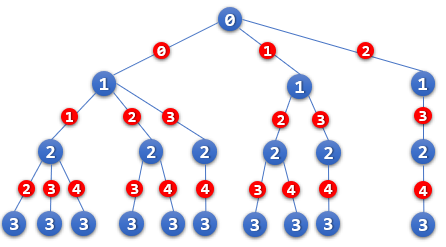

### 중복을 허용한 조합

In [ ]:
a = ['배', '감']
n = 2
k = 3

배 배 배
배 배 감
배 감 감
감 감 감

In [ ]:
a = ['배', '감', '귤']
n = 3
k = 3

a  b  c
배 배 배
배 배 감
배 배 귤
배 감 감
배 감 귤
배 귤 귤
감 감 감
감 감 귤
감 귤 귤
귤 귤 귤

In [ ]:
# 반복문 작성
a = ['배', '감', '귤']
n = 3
for i in range(0, n):
    for j in range(i, n):
        for k in range(j, n):
            print(a[i], a[j], a[k])

In [ ]:
# 재귀로 작성
a = ['배', '감', '귤']
n = 3
k = 3
arr = [0]*k
def combination(level, start):
    # 종료조건
    if level >= k:
        print(arr)
        return
    for i in range(start, n):
        arr[level] = a[i]
        combination(level+1, i)

combination(0, 0)        

['배', '배', '배']
['배', '배', '감']
['배', '배', '귤']
['배', '감', '감']
['배', '감', '귤']
['배', '귤', '귤']
['감', '감', '감']
['감', '감', '귤']
['감', '귤', '귤']
['귤', '귤', '귤']


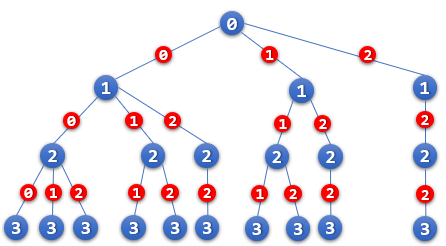